### <b> Netflix is known for its work in data science, AI, and ML, particularly for building strong recommendation models and algorithms that understand customer behavior and patterns. Suppose you are working in a data-driven job role, and you have a dataset of more than 9,000 movies. You need to solve the following questions to help the company make informed business decisions accordingly.

- 1. What is the most frequent genre of movies released on Netflix?
- 2. Which has highest votes in vote avg column?
- 3. What movie got the highest popularity? What's its genre?
- 4. What movie got the lowest popularity? What's its genre?
- 5. Which year has the most filmed movies?

In [1]:
# importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the CSV file from local system 
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [4]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [7]:
df.isnull().sum() # There are no null values

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [8]:
print(df.duplicated().sum()) # There are no duplicated values

0


In [9]:
# Data Frame Statistical analysis for only numerical columns.
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


### <b> Exploration Summary
- we have a dataframe consisting of 9827 rows and 9 columns.
- our dataset looks a bit tidy with no NaNs nor duplicated values.
- Release_Date column needs to be casted into date time and to extract only the year value.
- `Overview`, `Original_Languege` and `Poster-Url` wouldn't be so useful during analysis, so we will drop them.
- there is noticable outliers in Popularity column.
- `Vote_Average` bettter be categorised for proper analysis.
- Genre column has comma saperated values and white spaces that needs to be handled casted into category.Exploration summary.

# <b> <font color = 'blue'> Exploratory Data Analysis (EDA)

In [10]:
df['Release_Date'] = pd.to_datetime(df['Release_Date']) # Convert object type into date time 

In [11]:
print(df['Release_Date'].dtype)

datetime64[ns]


In [12]:
df['Release_Date'] = df['Release_Date'].dt.year # from Release_Date we extract year only

In [13]:
print(df['Release_Date'].dtype)

int32


In [14]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [15]:
# Removing/Droping the unwanted columns from Data Frame
cols_to_drop = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols_to_drop, axis=1, inplace=True)

In [16]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

### <b> categorizing Vote_Average column
- <b> We would cut the Vote_Average values and make 4 categories: popular average
below_avg not_popular to describe it more using `categorize_col()` function
provided above.

In [17]:
def categorize_col(df: pd.DataFrame, col: str, labels: str) -> pd.DataFrame:
    
    # setting the edges to cut the column accordingly
    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    df[col] = pd.cut(x = df[col], bins = edges, labels = labels, duplicates = 'drop')
    return df
    

In [18]:
# define labels for edges
labels = ['not_popular', 'below_avg', 'average', 'popular']
df = categorize_col(df, 'Vote_Average', labels)

In [19]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [20]:
df['Vote_Average'].nunique()

4

In [21]:
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [22]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [23]:
df.isna().sum()

Release_Date      0
Title             0
Popularity        0
Vote_Count        0
Vote_Average    100
Genre             0
dtype: int64

In [24]:
df.dropna(inplace=True)

In [25]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [26]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


### <b> We split genres into a list and then explode the dataframe, ensuring each movie has only one genre per row.

In [27]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')

In [28]:
df['Genre'].head()

0    [Action, Adventure, Science Fiction]
1              [Crime, Mystery, Thriller]
2                              [Thriller]
3    [Animation, Comedy, Family, Fantasy]
4      [Action, Adventure, Thriller, War]
Name: Genre, dtype: object

In [29]:
# explode the lists
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [30]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')

# confirming changes
print(df['Genre'].dtypes)

category


In [31]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

## <b> <font color = 'orange'>Data Visualization

### <b> 1. What is the most frequent genre of movies released on Netflix?

In [32]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

In [33]:
sns.set_theme()

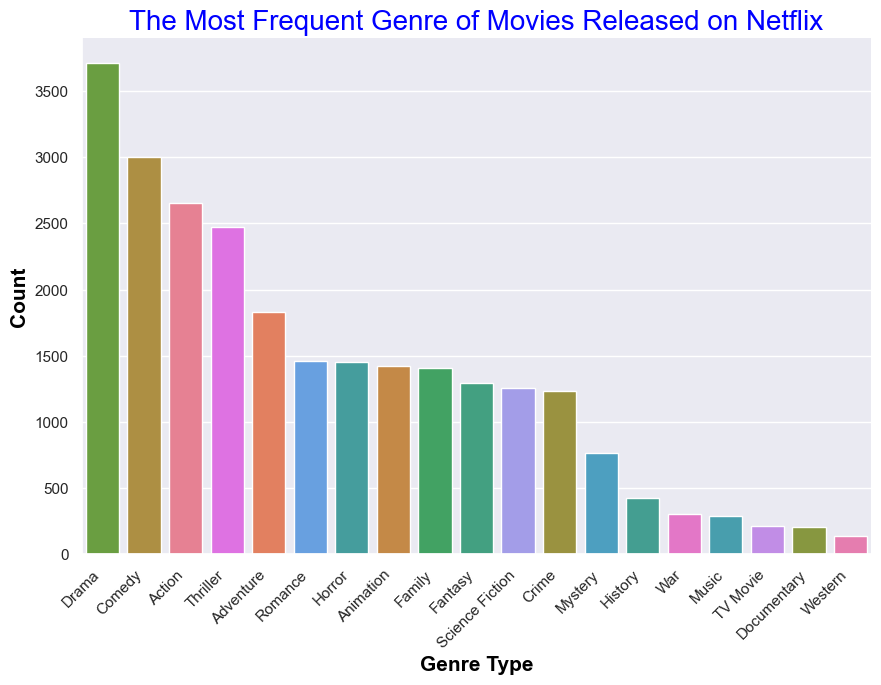

In [34]:
sns.catplot(x='Genre', data=df, kind='count', hue='Genre', height=6, aspect=1.5, order=df['Genre'].value_counts().index)

plt.title('The Most Frequent Genre of Movies Released on Netflix', 
               fontdict={'color': 'blue', 'family': 'arial', 'fontsize': 20})

plt.xlabel('Genre Type', fontdict={'color': 'black', 'family': 'arial', 'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel('Count', fontdict={'color': 'black', 'family': 'arial', 'fontsize': 15, 'fontweight': 'bold'})

plt.xticks(rotation=45, ha='right')

plt.show()

### <b> 2. Which has highest votes in vote avg column?

In [35]:
df['Vote_Average'].value_counts()

Vote_Average
average        6613
popular        6520
below_avg      6348
not_popular    6071
Name: count, dtype: int64

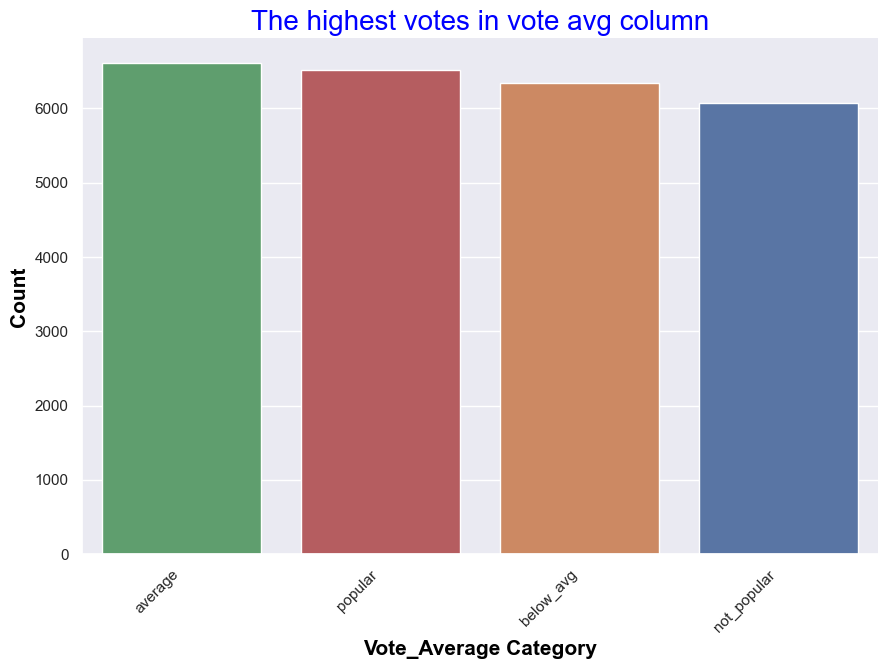

In [36]:
sns.catplot(x='Vote_Average', data=df, kind='count', hue='Vote_Average', height=6, aspect=1.5, order = df['Vote_Average'].value_counts().index)

plt.title('The highest votes in vote avg column', 
               fontdict={'color': 'blue', 'family': 'arial', 'fontsize': 20})

plt.xlabel('Vote_Average Category', fontdict={'color': 'black', 'family': 'arial', 'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel('Count', fontdict={'color': 'black', 'family': 'arial', 'fontsize': 15, 'fontweight': 'bold'})

plt.xticks(rotation=45, ha='right')

plt.show()

### <b> 3. What movie got the highest popularity? what's its genre?

In [37]:
# Find the movie with the highest popularity
highest_popularity_movie = df.groupby(['Title', 'Genre'])['Popularity'].max().reset_index()

In [38]:
# Get the movie with the highest popularity
highest_popular_movie = highest_popularity_movie.loc[highest_popularity_movie['Popularity'].idxmax()]

In [39]:
# Display the result
print("Movie with Highest Popularity")
print('-'*30)
print(f"Title : {highest_popular_movie['Title']}")
print(f"Genre : {highest_popular_movie['Genre']}")
print(f"Popularity Score : {highest_popular_movie['Popularity']}")

Movie with Highest Popularity
------------------------------
Title : Spider-Man: No Way Home
Genre : Action
Popularity Score : 5083.954


### <b> 4. What movie got the lowest popularity? what's its genre?

In [40]:
# Find the movie with the lowest popularity
lowest_popularity_movie = df.groupby(['Title', 'Genre'])['Popularity'].min().reset_index()

In [41]:
# Get the movie with the lowest popularity
lowest_popular_movie = lowest_popularity_movie.loc[lowest_popularity_movie['Popularity'].idxmin()]

In [42]:
# Display the result
print("Movie with Lowest Popularity")
print('-'*30)
print(f"Title : {lowest_popular_movie['Title']}")
print(f"Genre : {lowest_popular_movie['Genre']}")
print(f"Popularity Score : {lowest_popular_movie['Popularity']}")

Movie with Lowest Popularity
------------------------------
Title : The United States vs. Billie Holiday
Genre : Drama
Popularity Score : 13.354


### <b> 5. Which year has the most filmmed movies?

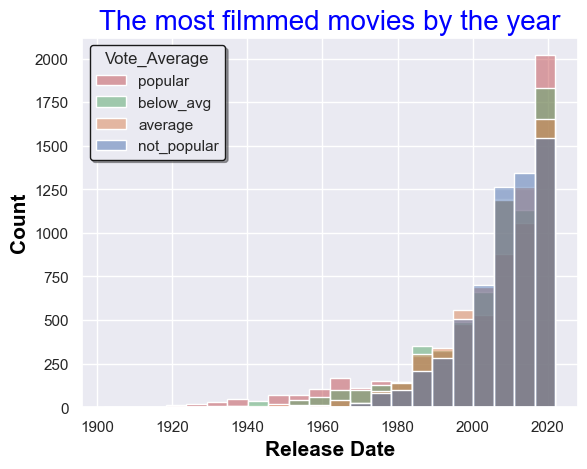

In [43]:
sns.histplot(data = df , x = 'Release_Date', bins = 50, hue = 'Vote_Average', binwidth = 5.5)
plt.title('The most filmmed movies by the year', 
               fontdict={'color': 'blue', 'family': 'arial', 'fontsize': 20})

plt.xlabel('Release Date', fontdict={'color': 'black', 'family': 'arial', 'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel('Count', fontdict={'color': 'black', 'family': 'arial', 'fontsize': 15, 'fontweight': 'bold'})

plt.legend(title = 'Vote_Average', shadow = True, labels = df['Vote_Average'].unique(), edgecolor = 'k')

plt.show()

## <b> <font color = 'orange'> Conclusion

### <b> Q1: What is the most frequent genre in the dataset?
- <b> Drama genre is the most frequent genre in our dataset and has appeared more than
14% of the times among 19 other genres.
  
### <b> Q2: What genres has highest votes ?
- <b> we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the
highest popularity among fans by being having more than 18.5% of movies popularities.

### <b> Q3: What movie got the highest popularity ? what's its genre?
- <b> Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
genres of Action , Adventure and Sience Fiction.

### <b> Q4: What movie got the lowest popularity ? what's its genre?
- <b> The united states, thread' has the highest lowest rate in our dataset and it has genres of music , drama , 'war', 'sci-fi' and history`.

### <b> Q5: Which year has the most filmmed movies?
- <b> year 2020 has the highest filmming rate in our dataset.